In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import math

# Linear Discriminant for $p = 1$, Examples

In [18]:
df = pd.DataFrame(columns=["X" , "Y" , "Class"])

K = 2

means = [0 , 0.5]
std = 0.1
pi = []

for k in range(K):
    N = 100
    pi.append(1 / K)
    X = np.random.normal(loc = means[k] , scale = std , size = N)
    for i in range(N):
        df.loc[len(df)] = [X[i] , 0 , k]

df

,X,Y,Class
0,0.056987,0.0,0.0
1,0.018536,0.0,0.0
2,0.009492,0.0,0.0
3,-0.166326,0.0,0.0
4,-0.018367,0.0,0.0
...,...,...,...
195,0.584247,0.0,1.0
196,0.527733,0.0,1.0
197,0.643337,0.0,1.0
198,0.470732,0.0,1.0


<Axes: xlabel='X', ylabel='Count'>

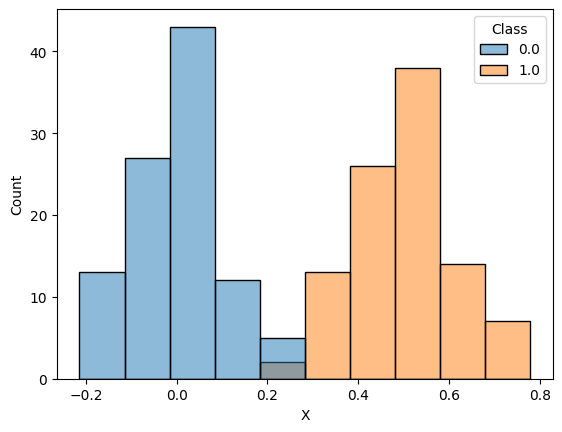

In [19]:
sns.histplot(data = df , x='X' , hue = "Class" , bins=10)

<Axes: xlabel='X', ylabel='Y'>

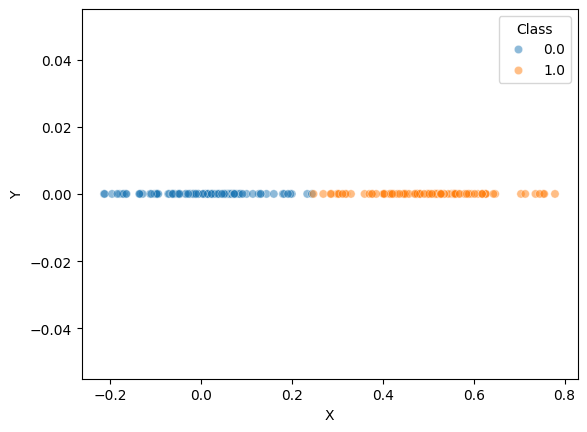

In [20]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class' , alpha = 0.5)

- 2 Classes are generated with the same standard deviation but different mean.

In [21]:
PI = math.pi
sigma = std

def f(k , x): # The LDA equation for p = 1
    return (1 / math.sqrt(2 * PI * sigma * sigma)) * math.exp(-(1/(2 * sigma * sigma)) * (x - means[k]) ** 2)

- With the $f_k(x)$ function above, we can calculate the probability that $x$ falls into class $k$.

In [22]:
x = 0

total = 0
for k in range(K):
    total += pi[k] * f(k , x)

for k in range(K):
    prob = pi[k] * f(k , x)
    prob /= total
    print("Probability that x would fall in class " , k , " = " , prob * 100 , "%" , sep="")

Probability that x would fall in class 0 = 99.99962733607158%
Probability that x would fall in class 1 = 0.0003726639284186568%


- For the result above, it's too obvious that $x = 0$ will falls into the first class.
- Lets make another example but less obvious.

In [23]:
x = 0.27

total = 0
for k in range(K):
    total += pi[k] * f(k , x)

for k in range(K):
    prob = pi[k] * f(k , x)
    prob /= total
    print("Probability that x would fall in class " , k , " = " , prob * 100 , "%" , sep="")

Probability that x would fall in class 0 = 26.894142136999495%
Probability that x would fall in class 1 = 73.1058578630005%


- Here, we see that the point $x = 0.27$ is somewhere in the middle of 2 classes. The LDA model predicts that $x$ fits best for the second class as the probability ~ 73.1%.
- Instead of calculating the whole equation, Let's only calculate the dicriminant function of LDA.

In [24]:
EPS = 0.00001

def discriminant(x):
    result_class = -1
    result_evaluation = 0
    for k in range(K):
        evaluation = 0

        evaluation += x * means[k] / sigma ** 2
        evaluation -= means[k] ** 2 / (2 * sigma ** 2)
        evaluation += math.log(pi[k])

        if result_class == -1 or evaluation > result_evaluation:
            result_evaluation = evaluation
            result_class = k

        print(f"Class {k} has the evaluation of {evaluation}")

    print(f"Best class fits for x = {x} is class {result_class} with the maximum evaluation of {result_evaluation} amongst all")

x = 0
discriminant(x)

Class 0 has the evaluation of -0.6931471805599453
Class 1 has the evaluation of -13.193147180559944
Best class fits for x = 0 is class 0 with the maximum evaluation of -0.6931471805599453 amongst all


In [25]:
x = 0.27
discriminant(x)

Class 0 has the evaluation of -0.6931471805599453
Class 1 has the evaluation of 0.3068528194400547
Best class fits for x = 0.27 is class 1 with the maximum evaluation of 0.3068528194400547 amongst all


- Based on the generated data, we can see that the decision boundary for 2 classes is $x = \frac{0 + 0.5}{2} = 0.25$, since $\mu_1 = 0 , \mu_2 = 0.5$

In [26]:
x = (means[0] + means[1])/2 + (math.log(pi[0]) - math.log(pi[1])) * ((std**2)/(means[0] - means[1]))

print('The boundary decision: x =' , x)

The boundary decision: x = 0.25


In [27]:
x = 0.25
discriminant(x)

Class 0 has the evaluation of -0.6931471805599453
Class 1 has the evaluation of -0.6931471805599453
Best class fits for x = 0.25 is class 0 with the maximum evaluation of -0.6931471805599453 amongst all


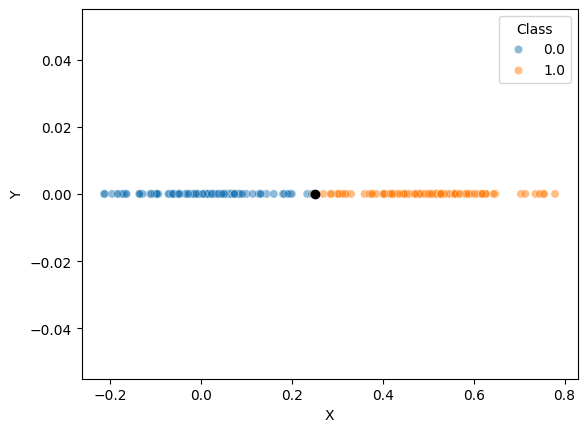

In [28]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class' , alpha = 0.5)
plt.scatter(x=0.25 , y = 0 , color = 'black')

- For illustration, the black dot on the graph is the Bayes boundary decision.

# Linear Discriminant for $p > 1$, example:

In [29]:
df = pd.DataFrame(columns=["X" , "Y" , "Class"])

K = 2

means = np.array([np.array([-0.5 , -0.5]) , np.array([0.5 , 0.5])])
std = np.array([[0.1 , 0.5] , [0.5 , 0.1]])
pi = []

for k in range(K):
    N = 100
    pi.append(1 / K)
    X = np.random.multivariate_normal(mean=means[k] , cov=std , size = 100)
    for i in range(N):
        df.loc[len(df)] = [X[i][0] , X[i][1] , k]

df

C:\Users\Minh Ha\AppData\Local\Temp\ipykernel_17120\639775262.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean=means[k] , cov=std , size = 100)
C:\Users\Minh Ha\AppData\Local\Temp\ipykernel_17120\639775262.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean=means[k] , cov=std , size = 100)


,X,Y,Class
0,-0.565791,-0.309461,0.0
1,-0.052940,-0.064599,0.0
2,-0.698777,-0.018666,0.0
3,-0.263953,0.187296,0.0
4,-0.237540,0.136445,0.0
...,...,...,...
195,1.473659,0.479983,1.0
196,-0.429350,-0.840888,1.0
197,1.036050,-0.818476,1.0
198,-0.032724,0.297080,1.0


<Axes: xlabel='X', ylabel='Y'>

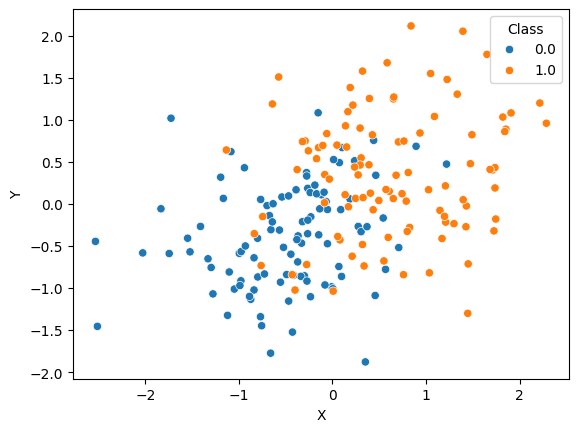

In [30]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class')

In [31]:
PI = math.pi

def f(k , x):
    det = abs(np.linalg.det(std))
    denominator = (2 * PI) ** (2 / 2) * det ** (1/2)
    mat = x - means[k]
    exponent = mat @ np.linalg.inv(std) @ mat.T
    exponent *= -1/2
    return 1/denominator * math.exp(exponent)

X = [1 , 1]

total = 0
for k in range(K):
    total += f(k , X)

for k in range(K):
    prob = f(k , X) / total
    print(f"The probability of X falling in class {k} is {prob*100:.3f}% ")




The probability of X falling in class 0 is 3.445% 
The probability of X falling in class 1 is 96.555% 


-1.6666666666666667 -1.6666666666666667
-1.6666666666666667 * x + -1.6666666666666667 * y = C


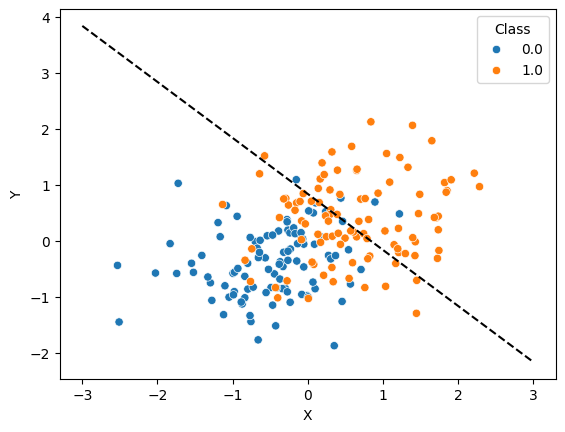

In [56]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class')

def decision_boundary():
    std_inv = np.linalg.inv(std)
    exponent = means[0].transpose() @ std_inv - means[1].transpose() @ std_inv
    print(exponent[0] , exponent[1])
    C = 1/2 * means[0].transpose() @ std_inv @ means[0] - 1/2 * means[1].transpose() @ std_inv @ means[1] + math.log(pi[0]) + math.log(pi[1])

    print(f"{exponent[0]} * x + {exponent[1]} * y = C")
    # y = (-exponent[0] * x + c ) / exponent[1]

    X = np.linspace(-3 , 3 , 100)
    Y = [((-exponent[0] * X[i] + C ) / exponent[1]) for i in range(100)]
    
    plt.plot(X , Y , c='black' , linestyle='dashed')

decision_boundary()

In [64]:
df = pd.DataFrame(columns=["X" , "Y" , "Class"])

K = 2

means = np.array([np.array([-1 , -1]) , np.array([1 , 1])])
std = np.array([[0.1 , 0.5] , [0.5 , 0.1]])
pi = []

for k in range(K):
    N = 100
    pi.append(1 / K)
    X = np.random.multivariate_normal(mean=means[k] , cov=std , size = 100)
    for i in range(N):
        df.loc[len(df)] = [X[i][0] , X[i][1] , k]

df

C:\Users\Minh Ha\AppData\Local\Temp\ipykernel_17120\1960592763.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean=means[k] , cov=std , size = 100)
C:\Users\Minh Ha\AppData\Local\Temp\ipykernel_17120\1960592763.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean=means[k] , cov=std , size = 100)


,X,Y,Class
0,0.547808,-0.886374,0.0
1,-0.336695,-0.356075,0.0
2,-0.951691,-2.263256,0.0
3,-1.349351,-1.667067,0.0
4,-1.409727,-0.959415,0.0
...,...,...,...
195,1.630354,1.588992,1.0
196,0.941772,0.597690,1.0
197,-0.081067,-0.479555,1.0
198,0.971648,0.468902,1.0


-3.3333333333333335 -3.3333333333333335
-3.3333333333333335 * x + -3.3333333333333335 * y = C
(np.float64(-3.104167892389941), np.float64(2.8487397857564885))


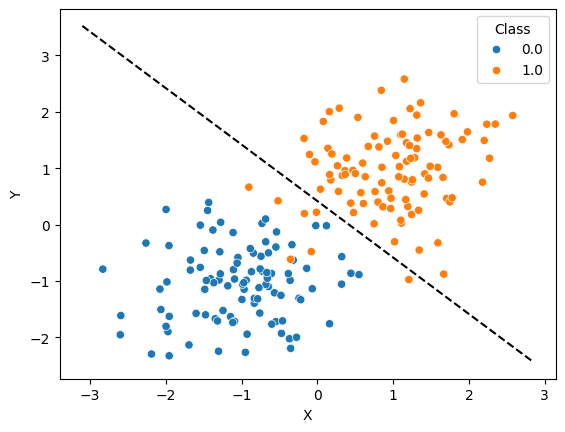

In [65]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class')

def decision_boundary():
    std_inv = np.linalg.inv(std)
    exponent = means[0].transpose() @ std_inv - means[1].transpose() @ std_inv
    print(exponent[0] , exponent[1])
    C = 1/2 * means[0].transpose() @ std_inv @ means[0] - 1/2 * means[1].transpose() @ std_inv @ means[1] + math.log(pi[0]) + math.log(pi[1])

    print(f"{exponent[0]} * x + {exponent[1]} * y = C")
    # y = (-exponent[0] * x + c ) / exponent[1]

    lims = plt.xlim()
    print(lims)
    X = np.linspace(lims[0] , lims[1] , 100)
    Y = [((-exponent[0] * X[i] + C ) / exponent[1]) for i in range(100)]
    
    plt.plot(X , Y , c='black' , linestyle='dashed')

decision_boundary()